In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm
import scipy.stats as stats
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import re
from joblib import dump,load

In [42]:
def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name

In [43]:
df_main=pd.read_csv(r'village_wise_survey_data_mission_antyodaya_2020.csv')

In [44]:
df_main.drop(columns=["SUB DISTRICT CODE","BLOCK CODE","GP CODE","VILLAGE CODE","VILLAGE PIN CODE","NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN NON-FARM ACTIVITIES"],
             inplace=True)
df_main.head()

,STATE CODE,DISTRICT CODE,NUMBER OF TOTAL POPULATION,NUMBER OF MALE,NUMBER OF FEMALE,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES,Seed_Center_Availability,WHETHER THIS VILLAGE IS A PART OF THE WATERSHED DEVELOPMENT PROJECT,AVAILABILITY OF COMMUNITY RAIN WATER HARVESTING SYSTEM/POND/DAM/CHECK DAM ETC.,...,NUMBER OF FARMERS RECEIVED THE SOIL TESTING REPORT,TOTAL NUMBER OF ELECTED REPRESENTATIVES,NUMBER OF ELECTED REPRESENTATIVES ORIENTED UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,NUMBER OF ELECTED REPRESENTATIVES UNDERGONE REFRESHER TRAINING UNDER RASHTRIYA GRAM SWARAJ ABHIYAN,TOTAL APPROVED LABOUR BUDGET FOR THE YEAR 2018-19,TOTAL EXPENDITURE APPROVED UNDER NRM IN THE LABOUR BUDGET FOR THE YEAR 2018-19),"TOTAL AREA COVERED UNDER IRRIGATION (DRIP, SPRINKLER), IF IN ACRES DIVIDE BY 2.47",NUMBER OF HOUSEHOLDS HAVING PIPED WATER CONNECTION,VILLAGE LATITUDE,VILLAGE LONGITUDE
0,18,294,299,139,160,68,50,B,No,No,...,6,8,6,4,0.0,0.0,0.0,0,26.090090,89.979380
1,18,616,4562,2366,2196,830,0,D,No,No,...,0,0,0,0,0.0,0.0,0.0,0,26.594595,91.641990
2,18,284,151,80,71,26,26,E,No,No,...,0,1,0,0,0.0,0.0,0.0,0,27.747747,95.118210
3,18,300,790,431,359,233,90,E,No,No,...,0,10,10,10,0.0,0.0,0.0,0,26.954954,94.561104
4,18,612,3050,1459,1591,780,50,D,No,No,...,0,0,0,0,0.0,0.0,0.0,0,26.702703,90.498500


In [45]:
cols=df_main.columns.tolist()
for i in range(len(cols)):
    if cols[i]=="DOES THE VILLAGE HAVE LIVESTOCK EXTENSION SERVICES":
        print(i)
        endcol=i

# Taking the  data from the last column to the one before "LIVESTOCK EXTENSION SERVICES" 
df=df_main.iloc[:,:endcol]

22


In [48]:
df.head()

,STATE CODE,DISTRICT CODE,NUMBER OF TOTAL POPULATION,NUMBER OF MALE,NUMBER OF FEMALE,NUMBER OF TOTAL HOUSEHOLD,NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES,Seed_Center_Availability,WHETHER THIS VILLAGE IS A PART OF THE WATERSHED DEVELOPMENT PROJECT,AVAILABILITY OF COMMUNITY RAIN WATER HARVESTING SYSTEM/POND/DAM/CHECK DAM ETC.,...,AVAILABILITY OF PRIMARY PROCESSING FACILITIES AT THE VILLAGE LEVEL,DOES THE VILLAGE HAVE ACCESS TO CUSTOM HIRING CENTRE (AGRI-EQUIPMENTS),"TOTAL CULTIVABLE AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47","NET SOWN AREA (IN HECTARES) , IF IN ACRES DIVIDE BY 2.47",AVAILABILITY OF SOIL TESTING CENTRES,AVAILABILITY OF FERTILIZER SHOP,MAIN SOURCE OF IRRIGATION,NUMBER OF FARMERS USING DRIP/SPRINKLER IRRIGATION,"TOTAL AREA IRRIGATED (IN HECTARE), IF IN ACRES DIVIDE BY 2.47","TOTAL UNIRRIGATED LAND AREA (IN HECTARES), IF IN ACRES DIVIDE BY 2.47"
0,18,294,299,139,160,68,50,B,No,No,...,No,No,3.00,Total Net sown Area :2 Kharif :2 Rabi :1.5 Oth...,No ( Nearest facility2-5 kms),No ( Nearest facility< 1 km),Other,12,1.5,1.5
1,18,616,4562,2366,2196,830,0,D,No,No,...,No,No,530.70,Total Net sown Area :2 Kharif :2 Rabi :2 Other :0,No ( Nearest facilityMore than 10 kms),No ( Nearest facilityMore than 10 kms),Surface water,0,0.0,0.0
2,18,284,151,80,71,26,26,E,No,No,...,No,No,7.00,Total Net sown Area :2 Kharif :2 Rabi :2 Other :0,No ( Nearest facilityMore than 10 kms),No ( Nearest facilityMore than 10 kms),Ground water (tube well/well/pump),0,0.0,7.0
3,18,300,790,431,359,233,90,E,No,No,...,No,No,143.47,Total Net sown Area :0 Kharif :0 Rabi :0 Other :0,No ( Nearest facilityMore than 10 kms),No ( Nearest facilityMore than 10 kms),Ground water (tube well/well/pump),0,0.0,0.0
4,18,612,3050,1459,1591,780,50,D,No,No,...,No,No,1.00,Total Net sown Area :0 Kharif :0 Rabi :0 Other :0,No ( Nearest facilityMore than 10 kms),No ( Nearest facility5-10 kms),Other,0,0.0,0.0


In [49]:
cols=df.columns.tolist()

# Cleaning data  
df["Percentage_Of_Farming_Houses"]=df["NUMBER OF HOUSEHOLDS ENGAGED MAJORLY IN FARM ACTIVITIES"]/(df["NUMBER OF TOTAL HOUSEHOLD"])
df["DOES THE VILLAGE HAS ANY FARMERS COLLECTIVE"]=df["DOES THE VILLAGE HAS ANY FARMERS COLLECTIVE"].map({"Primary Agriculture Cooperative Society(PACS)":"PACS","Farmers Produce Organization(FPOs)":"FPO","Both":"Both"})
df["MAIN SOURCE OF IRRIGATION"]=df["MAIN SOURCE OF IRRIGATION"].map({"Ground water (tube well/well/pump)":"Ground Water","Other":"Other","Canals":"Canals","Surface Water":"Surface Water"})


In [50]:
df["Area"]=df["DISTRICT CODE"]
df["Kharif"]=df["DISTRICT CODE"]
df["Rabi"]=df["DISTRICT CODE"]
df["Others"]=df["DISTRICT CODE"]


for i in tqdm(range(len(df))):
    string = str(df["NET SOWN AREA (IN HECTARES) , IF IN ACRES DIVIDE BY 2.47"][i])
    numbers = re.findall(r'\d+\.*\d*', string)
 
    df["Area"][i] =numbers[0]
    df["Kharif"][i]=numbers[1]
    df["Rabi"][i]=numbers[2]
    df["Others"][i]=numbers[3]

  0%|          | 0/345810 [00:00<?, ?it/s]C:\Users\garvb\AppData\Local\Temp\ipykernel_21952\3135869151.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Area"][i] =numbers[0]
C:\Users\garvb\AppData\Local\Temp\ipykernel_21952\3135869151.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kharif"][i]=numbers[1]
C:\Users\garvb\AppData\Local\Temp\ipykernel_21952\3135869151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [51]:
cols = ['availability of warehouse for food grain storage ','availability of soil testing centres','availability of fertilizer shop']
dic = dict(zip(df['availability of fertilizer shop'.upper()].value_counts().index.to_list(),['>10','5-10','2-5','Yes','1-2','<1']))


for col in cols:
    col=col.upper()
    df[col] = df[col].map(dic)


df=df.drop(columns="NET SOWN AREA (IN HECTARES) , IF IN ACRES DIVIDE BY 2.47")

In [52]:
cols = df.columns.to_list()
new_cols = [re.sub(r'[^a-zA-Z0-9_]' , '_', a.strip().lower()) for a in cols]
df.rename(columns=dict(zip(cols, new_cols)), inplace=True)
df.rename(columns=dict(zip(cols, new_cols)), inplace=True)
df.rename(columns={'total_area_irrigated__in_hectare___if_in_acres_divide_by_2_47': 'total_area_irrigated__in_hectare'},inplace=True)
df.rename(columns={'total_unirrigated_land_area__in_hectares___if_in_acres_divide_by_2_47': 'total_unirrigated_land_area__in_hectares'},inplace=True)

In [53]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col)

does_the_village_has_any_farmers_collective
main_source_of_irrigation


In [54]:
df.fillna('None',inplace=True)

In [55]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col)

In [56]:
df.to_csv("Agriculture.csv", index=False)

In [57]:
df=pd.read_csv("Agriculture.csv")
df.head()

,state_code,district_code,number_of_total_population,number_of_male,number_of_female,number_of_total_household,number_of_households_engaged_majorly_in_farm_activities,seed_center_availability,whether_this_village_is_a_part_of_the_watershed_development_project,availability_of_community_rain_water_harvesting_system_pond_dam_check_dam_etc_,...,availability_of_fertilizer_shop,main_source_of_irrigation,number_of_farmers_using_drip_sprinkler_irrigation,total_area_irrigated__in_hectare,total_unirrigated_land_area__in_hectares,percentage_of_farming_houses,area,kharif,rabi,others
0,18,294,299,139,160,68,50,B,No,No,...,<1,Other,12,1.5,1.5,0.735294,2.0,2.0,1.5,2.0
1,18,616,4562,2366,2196,830,0,D,No,No,...,>10,None,0,0.0,0.0,0.000000,2.0,2.0,2.0,0.0
2,18,284,151,80,71,26,26,E,No,No,...,>10,Ground Water,0,0.0,7.0,1.000000,2.0,2.0,2.0,0.0
3,18,300,790,431,359,233,90,E,No,No,...,>10,Ground Water,0,0.0,0.0,0.386266,0.0,0.0,0.0,0.0
4,18,612,3050,1459,1591,780,50,D,No,No,...,5-10,Other,0,0.0,0.0,0.064103,0.0,0.0,0.0,0.0


In [58]:
string = "+".join(df.drop('number_of_households_engaged_majorly_in_farm_activities',axis=1).columns.to_list())

In [59]:
string

'state_code+district_code+number_of_total_population+number_of_male+number_of_female+number_of_total_household+seed_center_availability+whether_this_village_is_a_part_of_the_watershed_development_project+availability_of_community_rain_water_harvesting_system_pond_dam_check_dam_etc_+does_the_village_has_any_farmers_collective+availability_of_warehouse_for_food_grain_storage+availability_of_primary_processing_facilities_at_the_village_level+does_the_village_have_access_to_custom_hiring_centre__agri_equipments_+total_cultivable_area__in_hectares___if_in_acres_divide_by_2_47+availability_of_soil_testing_centres+availability_of_fertilizer_shop+main_source_of_irrigation+number_of_farmers_using_drip_sprinkler_irrigation+total_area_irrigated__in_hectare+total_unirrigated_land_area__in_hectares+percentage_of_farming_houses+area+kharif+rabi+others'

In [60]:
fit1 = ols(f'number_of_households_engaged_majorly_in_farm_activities~{string}',data=df).fit()
p_value = sm.stats.anova_lm(fit1,typ=1)

In [95]:
p_value_sig=p_value[p_value['PR(>F)']<0.05].sort_values(by='PR(>F)', ascending=True)
p_value_sig

,df,sum_sq,mean_sq,F,PR(>F)
seed_center_availability,5.0,6.391020e+08,1.278204e+08,4327.024306,0.000000e+00
area,1.0,4.874673e+07,4.874673e+07,1650.192519,0.000000e+00
percentage_of_farming_houses,1.0,2.365388e+09,2.365388e+09,80073.992161,0.000000e+00
total_unirrigated_land_area__in_hectares,1.0,1.002087e+08,1.002087e+08,3392.303421,0.000000e+00
total_area_irrigated__in_hectare,1.0,3.046854e+08,3.046854e+08,10314.323510,0.000000e+00
number_of_farmers_using_drip_sprinkler_irrigation,1.0,1.945528e+08,1.945528e+08,6586.075950,0.000000e+00
number_of_total_household,1.0,3.946966e+08,3.946966e+08,13361.417419,0.000000e+00
number_of_female,1.0,2.247278e+08,2.247278e+08,7607.568988,0.000000e+00
number_of_male,1.0,2.552633e+09,2.552633e+09,86412.687854,0.000000e+00
number_of_total_population,1.0,6.168737e+09,6.168737e+09,208826.409684,0.000000e+00


In [62]:
cols_sig=p_value_sig.index.tolist()
cols_sig.append("number_of_households_engaged_majorly_in_farm_activities")
cols_sig

['seed_center_availability',
 'area',
 'percentage_of_farming_houses',
 'total_unirrigated_land_area__in_hectares',
 'total_area_irrigated__in_hectare',
 'number_of_farmers_using_drip_sprinkler_irrigation',
 'number_of_total_household',
 'number_of_female',
 'number_of_male',
 'number_of_total_population',
 'main_source_of_irrigation',
 'availability_of_fertilizer_shop',
 'availability_of_warehouse_for_food_grain_storage',
 'does_the_village_has_any_farmers_collective',
 'availability_of_community_rain_water_harvesting_system_pond_dam_check_dam_etc_',
 'whether_this_village_is_a_part_of_the_watershed_development_project',
 'availability_of_soil_testing_centres',
 'total_cultivable_area__in_hectares___if_in_acres_divide_by_2_47',
 'kharif',
 'others',
 'district_code',
 'rabi',
 'does_the_village_have_access_to_custom_hiring_centre__agri_equipments_',
 'state_code',
 'number_of_households_engaged_majorly_in_farm_activities']

In [63]:
df_sig = df[cols_sig]
df_sig.head()

,seed_center_availability,area,percentage_of_farming_houses,total_unirrigated_land_area__in_hectares,total_area_irrigated__in_hectare,number_of_farmers_using_drip_sprinkler_irrigation,number_of_total_household,number_of_female,number_of_male,number_of_total_population,...,whether_this_village_is_a_part_of_the_watershed_development_project,availability_of_soil_testing_centres,total_cultivable_area__in_hectares___if_in_acres_divide_by_2_47,kharif,others,district_code,rabi,does_the_village_have_access_to_custom_hiring_centre__agri_equipments_,state_code,number_of_households_engaged_majorly_in_farm_activities
0,B,2.0,0.735294,1.5,1.5,12,68,160,139,299,...,No,2-5,3.00,2.0,2.0,294,1.5,No,18,50
1,D,2.0,0.000000,0.0,0.0,0,830,2196,2366,4562,...,No,>10,530.70,2.0,0.0,616,2.0,No,18,0
2,E,2.0,1.000000,7.0,0.0,0,26,71,80,151,...,No,>10,7.00,2.0,0.0,284,2.0,No,18,26
3,E,0.0,0.386266,0.0,0.0,0,233,359,431,790,...,No,>10,143.47,0.0,0.0,300,0.0,No,18,90
4,D,0.0,0.064103,0.0,0.0,0,780,1591,1459,3050,...,No,>10,1.00,0.0,0.0,612,0.0,No,18,50


In [64]:
df_sig.describe().T

,count,mean,std,min,25%,50%,75%,max
area,345810.0,203.003951,394.824544,0.00000,17.000000,80.000000,226.550000,9998.0
percentage_of_farming_houses,345810.0,0.569898,0.322330,0.00000,0.318923,0.642857,0.842105,1.0
total_unirrigated_land_area__in_hectares,345810.0,103.634679,282.235416,0.00000,1.000000,20.000000,98.000000,9999.0
total_area_irrigated__in_hectare,345810.0,119.790157,278.927449,0.00000,1.100000,26.660000,122.390000,9908.0
number_of_farmers_using_drip_sprinkler_irrigation,345810.0,28.078459,121.136543,0.00000,0.000000,0.000000,12.000000,11254.0
number_of_total_household,345810.0,353.965837,650.832729,1.00000,87.000000,198.000000,405.000000,94678.0
number_of_female,345810.0,752.083919,1119.953143,0.00000,200.000000,440.000000,896.000000,60000.0
number_of_male,345810.0,814.324456,1247.722677,0.00000,210.000000,471.000000,953.000000,93463.0
number_of_total_population,345810.0,1638.625569,2853.054313,1.00000,416.000000,925.000000,1872.000000,99999.0
total_cultivable_area__in_hectares___if_in_acres_divide_by_2_47,345810.0,343.461729,3759.987442,0.00001,45.000000,150.000000,379.000000,2180218.0


In [65]:
df_sig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345810 entries, 0 to 345809
Data columns (total 25 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   seed_center_availability                                                        345810 non-null  object 
 1   area                                                                            345810 non-null  float64
 2   percentage_of_farming_houses                                                    345810 non-null  float64
 3   total_unirrigated_land_area__in_hectares                                        345810 non-null  float64
 4   total_area_irrigated__in_hectare                                                345810 non-null  float64
 5   number_of_farmers_using_drip_sprinkler_irrigation                               345810 non-null  int64  
 6   numb

In [66]:
for col in df_sig.columns:
    if pd.api.types.is_object_dtype(df_sig[col]):

        print(df_sig[col].value_counts())
        print()

E      117343
D      111283
C       64758
Yes     31400
B       15628
A        5398
Name: seed_center_availability, dtype: int64

Ground Water    179771
Other            79704
Canals           48775
None             37560
Name: main_source_of_irrigation, dtype: int64

>10     102788
5-10    100276
2-5      68139
Yes      52213
1-2      17051
<1        5343
Name: availability_of_fertilizer_shop, dtype: int64

>10     130460
5-10    107546
2-5      57700
Yes      30955
1-2      14088
<1        5061
Name: availability_of_warehouse_for_food_grain_storage, dtype: int64

None    263962
PACS     37087
Both     28048
FPO      16713
Name: does_the_village_has_any_farmers_collective, dtype: int64

No     216997
Yes    128813
Name: availability_of_community_rain_water_harvesting_system_pond_dam_check_dam_etc_, dtype: int64

No     278988
Yes     66822
Name: whether_this_village_is_a_part_of_the_watershed_development_project, dtype: int64

>10     169610
5-10    104201
2-5      43689
Yes      1564

In [67]:
df1 = df_sig.copy()

In [68]:
dummy_cols = [col for col in df1.columns if pd.api.types.is_object_dtype(df1[col])]
dummy_df = pd.get_dummies(df1, columns=dummy_cols)
df1 = pd.concat([df1,dummy_df], axis=1)
df1.drop(dummy_cols,inplace=True, axis= 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345810 entries, 0 to 345809
Data columns (total 70 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   area                                                                                345810 non-null  float64
 1   percentage_of_farming_houses                                                        345810 non-null  float64
 2   total_unirrigated_land_area__in_hectares                                            345810 non-null  float64
 3   total_area_irrigated__in_hectare                                                    345810 non-null  float64
 4   number_of_farmers_using_drip_sprinkler_irrigation                                   345810 non-null  int64  
 5   number_of_total_household                                                           34

In [69]:
X = df1.drop('number_of_households_engaged_majorly_in_farm_activities', axis=1)
y = df1['number_of_households_engaged_majorly_in_farm_activities']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1920)

In [71]:
LinearRegression = LinearRegression()
Ridge = Ridge()
Lasso = Lasso()
ElasticNet = ElasticNet()
RandomForestRegressor = RandomForestRegressor(n_jobs=-1)

In [72]:
algos = [LinearRegression ,Ridge ,Lasso, ElasticNet, RandomForestRegressor]

In [73]:
scores = []
mses = []
algo_names = []

for algo in tqdm(algos):
    algo.fit(X_train,y_train)
    algo_name = get_var_name(algo)
    dump(value=algo,filename=f'{algo_name}.joblib')
    y_pred = algo.predict(X_test)
    acc_score = algo.score(X_test,y_test)
    mse = mean_squared_error(y_test,y_pred)
    algo_names.append(algo_name)
    scores.append(acc_score)
    mses.append(mse)

algo_scores = pd.DataFrame(
    {
        'Algorithm' : algo_names,
        'Score' : scores,
        'MSE' : mses
    }
)

  0%|          | 0/5 [00:00<?, ?it/s]

 40%|████      | 2/5 [00:02<00:03,  1.26s/it]c:\Users\garvb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+09, tolerance: 2.024e+06
  model = cd_fast.enet_coordinate_descent(
 60%|██████    | 3/5 [02:00<01:49, 54.54s/it]c:\Users\garvb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.025e+09, tolerance: 2.024e+06
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 5/5 [09:17<00:00, 111.41s/it]


In [74]:
scores = []
mses = []
algo_names = []

for alg in tqdm(algos):
    algo_name = get_var_name(alg)
    algo = load(filename=f'{algo_name}.joblib')
    y_pred = algo.predict(X_test)
    acc_score = algo.score(X_test,y_test)
    mse = mean_squared_error(y_test,y_pred)
    algo_names.append(algo_name)
    scores.append(acc_score)
    mses.append(mse)

algo_scores = pd.DataFrame(
    {
        'Algorithm' : algo_names,
        'Score' : scores,
        'MSE' : mses
    }
)

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


In [94]:
display(algo_scores)

print(f"Best in MSE--> {df.iloc[np.argmin(algo_scores['MSE']),0]}")
print(f"Best in Score--> {df.iloc[np.argmax(algo_scores['Score']),0]}")

,Algorithm,Score,MSE
0,LinearRegression,0.609575,27948.448895
1,Ridge,0.609555,27949.888596
2,Lasso,0.608597,28018.411201
3,ElasticNet,0.557032,31709.704806
4,RandomForestRegressor,0.993392,473.014705


Best in MSE--> RandomForestRegressor
Best in Score--> RandomForestRegressor


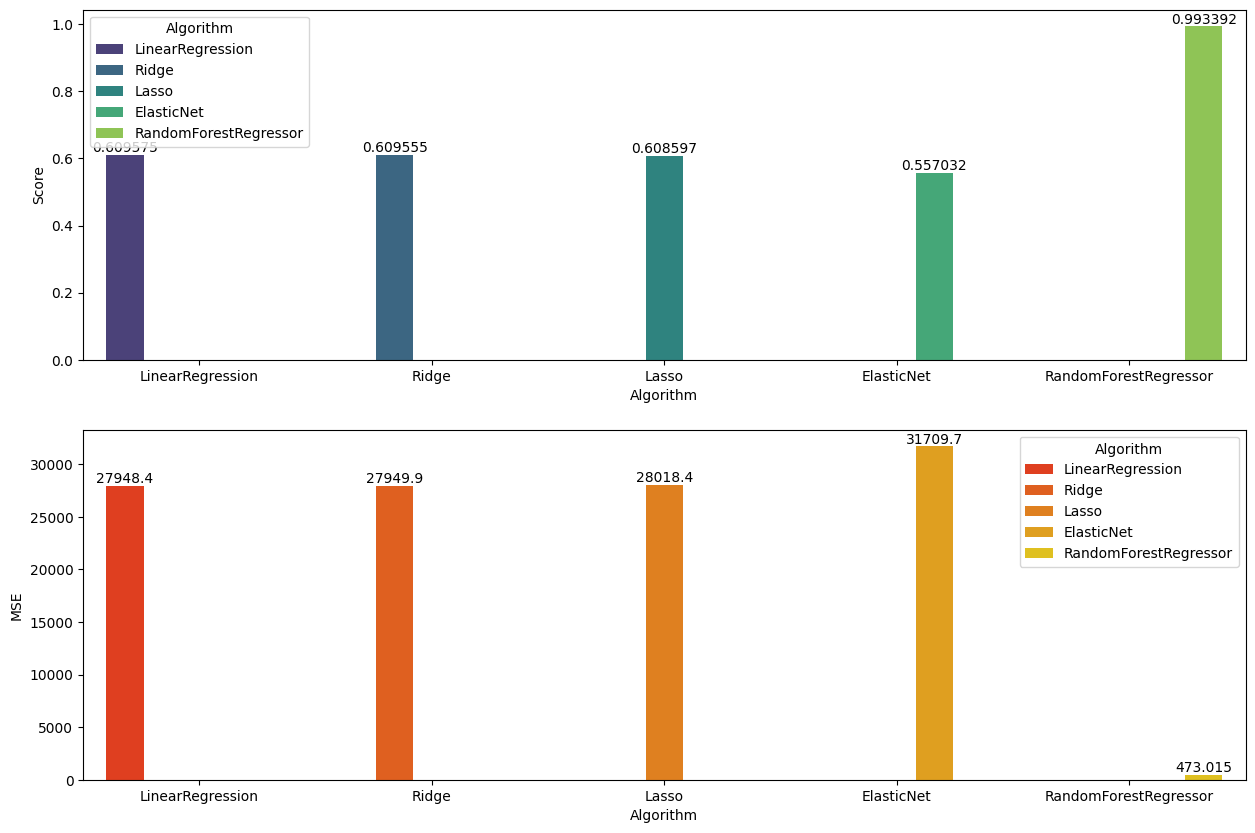

In [84]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 10))
sns.barplot(
    x='Algorithm',
    y='Score',
    data=algo_scores,
    ax=axs[0],
    palette='viridis',
    hue='Algorithm'
)
for i in axs[0].containers:
    axs[0].bar_label(i,)
sns.barplot(
    x='Algorithm',
    y='MSE',
    data=algo_scores,
    ax=axs[1],
    palette='autumn',
    hue='Algorithm'
)
for i in axs[1].containers:
    axs[1].bar_label(i,)
plt.show()

In [76]:
for alg in tqdm(algos):
    alg = load(filename=f'{get_var_name(alg)}.joblib')

100%|██████████| 5/5 [00:01<00:00,  2.96it/s]
